In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

In [ ]:
os.environ["CUDA_VISIBLE_DEVICES"]="-1"

In [1]:
import torch
print(torch.cuda.is_available())
print(torch.cuda.get_device_name(0))

True
Tesla T4


In [2]:
pip install detecto

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
  Using cached nvidia_nvjitlink_cu12-12.4.127-py3-none-m

In [11]:
import torchvision
from torchvision import  transforms
from detecto import core, utils, visualize
import numpy as np
import seaborn as sns
from torchvision import transforms as tf
from detecto.visualize import show_labeled_image, plot_prediction_grid

In [12]:
cus_trans = tf.Compose([
tf.ToPILImage(),
tf.Resize(700),
tf.RandomVerticalFlip(0.4),
tf.RandomHorizontalFlip(0.4),
tf.ColorJitter(saturation=0.3),
tf.ToTensor(),
utils.normalize_transform(),
])

In [13]:
tr_ds=core.Dataset('drive/MyDrive/Train',transform=cus_trans)
te_ds = core.Dataset('drive/MyDrive/Test')

In [14]:
tr_ds.__len__

<bound method Dataset.__len__ of <detecto.core.Dataset object at 0x79bc7331f880>>

In [15]:
lr=core.DataLoader(tr_ds, batch_size=4, shuffle=True)

In [16]:
model_ = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
model_.eval()

for name, param in model_.named_parameters():
    param.requires_grad = False
print("done")

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth
100%|██████████| 160M/160M [00:01<00:00, 114MB/s]


done


In [20]:
torch_model = model_
print(type(torch_model))
print(torch_model)

<class 'torchvision.models.detection.faster_rcnn.FasterRCNN'>
FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          

In [21]:
model = core.Model(['ball,player'])

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [22]:
losses = model.fit(lr, te_ds, epochs=10, lr_step_size=10, learning_rate=0.0001, verbose=True)

Epoch 1 of 10
Begin iterating over training dataset


100%|██████████| 9/9 [01:43<00:00, 11.45s/it]


Begin iterating over validation dataset


100%|██████████| 17/17 [00:52<00:00,  3.11s/it]


Loss: 0.27813245356082916
Epoch 2 of 10
Begin iterating over training dataset


100%|██████████| 9/9 [00:27<00:00,  3.09s/it]


Begin iterating over validation dataset


100%|██████████| 17/17 [00:17<00:00,  1.04s/it]


Loss: 0.31213855392792644
Epoch 3 of 10
Begin iterating over training dataset


100%|██████████| 9/9 [00:26<00:00,  2.91s/it]


Begin iterating over validation dataset


100%|██████████| 17/17 [00:18<00:00,  1.10s/it]


Loss: 0.3115554066265331
Epoch 4 of 10
Begin iterating over training dataset


100%|██████████| 9/9 [00:25<00:00,  2.88s/it]


Begin iterating over validation dataset


100%|██████████| 17/17 [00:17<00:00,  1.04s/it]


Loss: 0.29899871962911945
Epoch 5 of 10
Begin iterating over training dataset


100%|██████████| 9/9 [00:26<00:00,  2.93s/it]


Begin iterating over validation dataset


100%|██████████| 17/17 [00:17<00:00,  1.05s/it]


Loss: 0.2604185097357806
Epoch 6 of 10
Begin iterating over training dataset


100%|██████████| 9/9 [00:25<00:00,  2.88s/it]


Begin iterating over validation dataset


100%|██████████| 17/17 [00:18<00:00,  1.09s/it]


Loss: 0.244425711386344
Epoch 7 of 10
Begin iterating over training dataset


100%|██████████| 9/9 [00:26<00:00,  2.95s/it]


Begin iterating over validation dataset


100%|██████████| 17/17 [00:17<00:00,  1.01s/it]


Loss: 0.23813453579650207
Epoch 8 of 10
Begin iterating over training dataset


100%|██████████| 9/9 [00:26<00:00,  2.92s/it]


Begin iterating over validation dataset


100%|██████████| 17/17 [00:18<00:00,  1.09s/it]


Loss: 0.24994203448295593
Epoch 9 of 10
Begin iterating over training dataset


100%|██████████| 9/9 [00:26<00:00,  2.91s/it]


Begin iterating over validation dataset


100%|██████████| 17/17 [00:18<00:00,  1.09s/it]


Loss: 0.24345213437781615
Epoch 10 of 10
Begin iterating over training dataset


100%|██████████| 9/9 [00:26<00:00,  2.98s/it]


Begin iterating over validation dataset


100%|██████████| 17/17 [00:17<00:00,  1.02s/it]

Loss: 0.2457060743780697


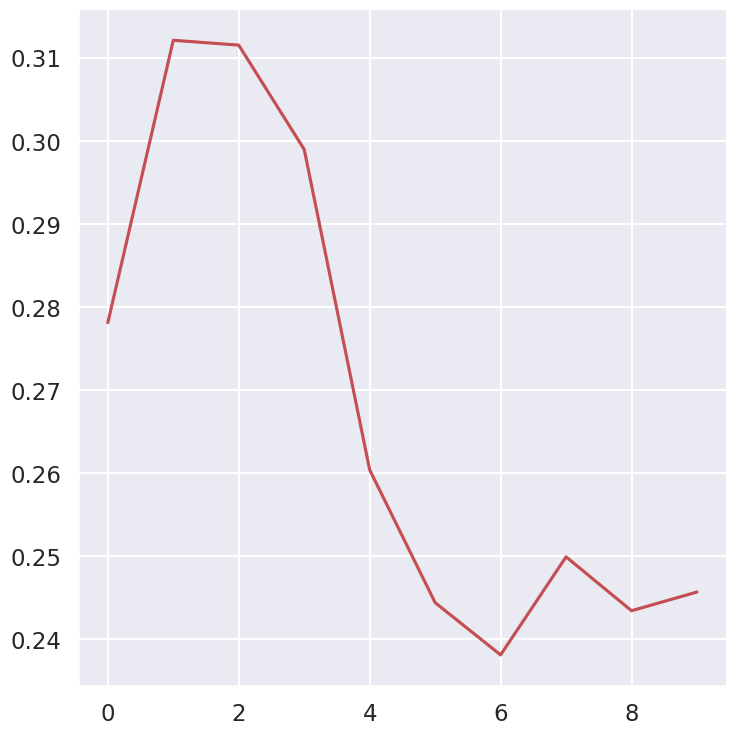

In [23]:
sns.set_theme('talk')
sns.relplot(data = losses,kind = 'line',color = 'r',height=8,legend = 'auto')

In [24]:
model.save('model_weights.pth')
model = core.Model.load('model_weights.pth', ['bicycle'])

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


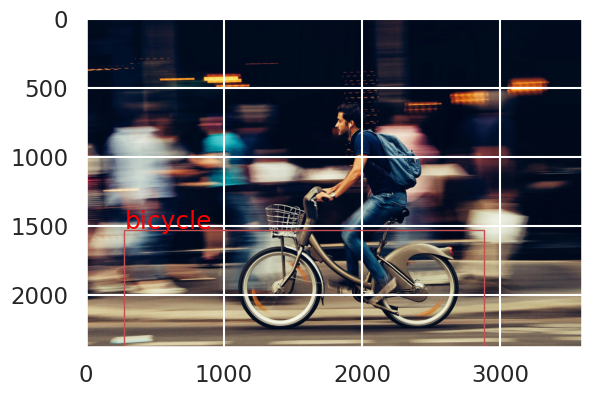

In [34]:
image = utils.read_image('drive/MyDrive/Test/bicycle-50.jpg')
preds = model.predict(image)
labels, boxes, scores = preds
filtr_ind=np.where(scores>0.290)
filtr_scr=scores[filtr_ind]
filtr_boxes=boxes[filtr_ind]
num_list = list(filtr_ind[0])
filtr_labels = []
for i in num_list:
  filtr_labels.append(labels[i])
show_labeled_image(image, filtr_boxes, filtr_labels)

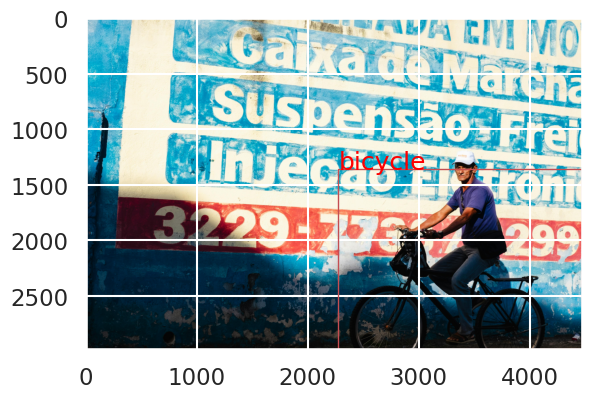

In [36]:
image = utils.read_image('drive/MyDrive/Test/bicycle-40.jpg')
preds = model.predict(image)
labels, boxes, scores = preds
filtr_ind=np.where(scores>0.340)
filtr_scr=scores[filtr_ind]
filtr_boxes=boxes[filtr_ind]
num_list = list(filtr_ind[0])
filtr_labels = []
for i in num_list:
  filtr_labels.append(labels[i])
show_labeled_image(image, filtr_boxes, filtr_labels)

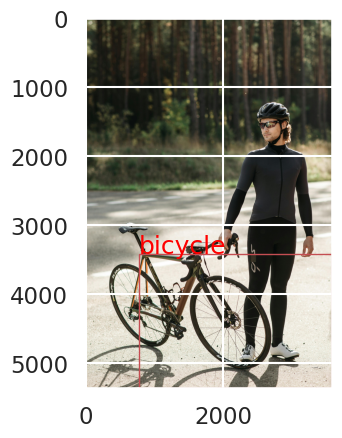

In [51]:
image = utils.read_image('drive/MyDrive/Test/bicycle-48.jpg')
preds = model.predict(image)
labels, boxes, scores = preds
filtr_ind=np.where(scores>0.305)
filtr_scr=scores[filtr_ind]
filtr_boxes=boxes[filtr_ind]
num_list = list(filtr_ind[0])
filtr_labels = []
for i in num_list:
  filtr_labels.append(labels[i])
show_labeled_image(image, filtr_boxes, filtr_labels)